# Homework 3: The Flash Crash

## By Albert S. (Pete) Kyle

## BUFN400 2023---University of Maryland 

This homework is due before class on Monday, October 16, 2023.

If you would like to change your answers after the homework is due, you may submit a revised version before the final exam.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# The Flash Crash

During the afternoon of May 6, 2010, there was a sudden drop in the stock market and then a fast rebound in prices, all taking place over a time frame less than one hour. This event is commonly called the "Flash Crash".  

This homework is based on transaction-by-transaction data for the the S&P 500 E-Mini future contract and the SPDR ETF SPY on the day of the flash crash. There are four files: trades for the future contract, quotes for the futures contract, trades for the SPY ETF, and quotes for the SPY ETF. These files are available on Canvas.

The S&P 500 E-mini (ESM) is a futures contract which tracks the S&P 500 index. The seemingly strange name "ESM10" has the following explanation: "E"  represents E-mini, "S" represents S&P 500, "M" is an abbreviation for the month of June, and "10" represents the year 2010. The futures contract is cash-settled. This means that its expiration value on June 2010 is the price of the S&P 500 calculated from market prices at the settlement date in June 2010.  The E-mini is structured so that its price is approximately equal to the value  of the S&P 500. One contract has a value equal to 50 times the S&P 500.

The SPY ETF is one of multiple ETFs in the SPDR (Spider) complex.  In the acronym "SPDR", the "SP" represents "Standard & Poor's", and the "DR" represents "Depository Receipt." The SPY is a specific depository receipt which tracks the S&P500 index. The buyer of the SPY holds something equivalent to the basket of stocks underlying the S&P500. The SPY is structured so that the price of one share is approximately one tenth of the S&P 500 index.

I have written a paper on the Flash Crash (posted on Canvas):

Kirilenko, Andrei, Albert S. Kyle, Mehrdad Samadi, and Tugkan Tuzun. "The flash crash: High‐frequency trading in an electronic market." *Journal of Finance 72*, no. 3 (2017): 967-998.  Feel free to look at this paper to get an idea of what the solutions to some of the problems below might look like.


In [8]:
df_spy_trades = pd.read_csv("SPY-trades-2010-05-06.csv")
df_spy_quotes = pd.read_csv("SPY-raw-quotes-2010-05-06.csv")
df_esm_trades = pd.read_csv("ESM10-trades-2010-05-06.csv")
df_esm_quotes = pd.read_csv("ESM10-quotes-2010-05-06.csv")

# Problem 1: Read and Clean Data

A. Download the data from Canvas. Print a few lines of data. Convert columns to appropriate dtypes. Calculate some basic statistics.   

B. Determine the effective granularity of the time stamps (e.g., seconds, milliseconds, microseconds, nanoseconds). Determine also whether the time zones are consistent; if not, make appropriate adjustments to convert all times to New York time. We are interested in trades and quotes during regular stock market hours, which are 9:30 a.m. to 4:00 p.m. New York time.

C. In the ESM10 quote data, fix the issue of missing bid prices, bid quantities, ask prices, and ask prices. (Hint: Consider using the the function *pd.fillna()* with appropriate options.)

D. Explain briefly why other prices and quantities are missing, zero, or very small. (Hint: Keep in mind that, during the Flash Crash, there were ridiculously large and small prices for some stocks due to vanishing market liquidity.  Some stocks, which should have traded at approximately, say, 50.00 (dollars), actually had extreme bid, ask, or trade prices of 0.01 or 9999.99. These prices were not data errors but rather symptoms of the market functioning poorly.)

E. (Extra Credit) Study whether the quote data are consistent with the trade data. For example, do trades occur at the prevailing bid or ask price based on reported time stamps? Do ESM10 quantities bid and ask prices appear to change consistently based the time stamps of trades and quote changes?


# Problem 1 Solution
A. For SPY Trades, observe that the columns `sym_root`, `sym_suffix`, and `date` are always constant values, as illustrated with the `.nunique()` function, so there isn't too much purpose in converting them to appropriate datatypes. On the other hand, I converted `time_m` to datetime, and the `price`, `size`, and `exchange` columns are all fine. Note that we have all trades for the SPDR ETF SPY on May 6, 2010, since the trades span the entire market hours. I applied the same cleaning process to the SPY Quotes dataframe, since the `bid` and `ask` and their size columns are all appropriate dtypes.. I noticed that converting strings to datetime objects was takiing significantly longer for Quotes than Trades, so I printed out the number of entries in each both. I did pretty much the same thing for the ESM dataframes. Converting to appropriate market hours is done in Part B.

B. Using `dt.tz_convert("America/New_York")`, we can convert the timestamp to New York time.

In [9]:
# Parts A (+ part B changing the time to New York time)

# SPY Trades
display("SPY Trades", df_spy_trades.head())
print("The column datatypes are\n", df_spy_trades.dtypes)
print(df_spy_trades["sym_root"].nunique(), df_spy_trades["sym_suffix"].nunique(), df_spy_trades["date"].nunique())
df_spy_trades["time_m"] = pd.to_datetime(df_spy_trades["time_m"])

# SPY Quotes
display("SPY Quotes", df_spy_quotes.head())
print("The column datatypes are\n", df_spy_quotes.dtypes)
df_spy_quotes["time_m"] = pd.to_datetime(df_spy_quotes["time_m"])

print(f"The shape of SPY Trades is {df_spy_trades.shape} and the shape of SPY Quotes is {df_spy_quotes.shape}")

# ESM Trades
display("ESM Trades", df_esm_trades.head())
print("The column dtypes are", df_esm_trades.dtypes)
df_esm_trades['Date-Time'] = pd.to_datetime(df_esm_trades['Date-Time']).dt.tz_convert("America/New_York")
display(df_esm_trades)

# ESM Quotes
display("ESM Quotes", df_esm_quotes.head())
print("The column dtypes are", df_esm_quotes.dtypes)
df_esm_quotes['Date-Time'] = pd.to_datetime(df_esm_quotes['Date-Time']).dt.tz_convert("America/New_York")
display(df_esm_quotes)

'SPY Trades'

,sym_root,sym_suffix,date,time_m,price,size,exchange
0,SPY,,20100506,9:30:00.044,116.26,200,B
1,SPY,,20100506,9:30:00.046,116.26,200,B
2,SPY,,20100506,9:30:00.046,116.26,100,B
3,SPY,,20100506,9:30:00.046,116.26,100,Z
4,SPY,,20100506,9:30:00.046,116.26,100,Z


The column datatypes are
 sym_root       object
sym_suffix     object
date            int64
time_m         object
price         float64
size            int64
exchange       object
dtype: object
1 1 1


'SPY Quotes'

,sym_root,sym_suffix,date,time_m,exchange,bid,ask,bidsize,asksize
0,SPY,,20100506,9:30:00.011000000,Z,116.24,116.26,38,42
1,SPY,,20100506,9:30:00.013000000,Z,116.24,116.26,38,41
2,SPY,,20100506,9:30:00.017000000,Z,116.24,116.26,38,43
3,SPY,,20100506,9:30:00.018000000,B,116.24,116.25,4,2
4,SPY,,20100506,9:30:00.018000000,B,116.24,116.25,3,2


The column datatypes are
 sym_root       object
sym_suffix     object
date            int64
time_m         object
exchange       object
bid           float64
ask           float64
bidsize         int64
asksize         int64
dtype: object
The shape of SPY Trades is (1484979, 7) and the shape of SPY Quotes is (7762857, 9)


'ESM Trades'

,Date-Time,Price,Volume
0,2010-05-06T12:00:00.147029000Z,1163.0,4.0
1,2010-05-06T12:00:00.147029000Z,1163.0,10.0
2,2010-05-06T12:00:00.147029000Z,1163.0,1.0
3,2010-05-06T12:00:00.147029000Z,1163.0,20.0
4,2010-05-06T12:00:00.147029000Z,1163.0,1.0


The column dtypes are Date-Time     object
Price        float64
Volume       float64
dtype: object


,Date-Time,Price,Volume
0,2010-05-06 08:00:00.147029-04:00,1163.00,4.0
1,2010-05-06 08:00:00.147029-04:00,1163.00,10.0
2,2010-05-06 08:00:00.147029-04:00,1163.00,1.0
3,2010-05-06 08:00:00.147029-04:00,1163.00,20.0
4,2010-05-06 08:00:00.147029-04:00,1163.00,1.0
...,...,...,...
1089248,2010-05-06 16:14:59.515830-04:00,1122.75,2.0
1089249,2010-05-06 16:14:59.522651-04:00,1122.75,1.0
1089250,2010-05-06 16:14:59.652561-04:00,1122.50,5.0
1089251,2010-05-06 16:14:59.868329-04:00,1122.50,5.0


'ESM Quotes'

,Date-Time,Bid Price,Bid Size,Ask Price,Ask Size
0,2010-05-06T12:00:00.177280000Z,1162.75,281.0,NaN,NaN
1,2010-05-06T12:00:00.177280000Z,NaN,NaN,1163.0,4.0
2,2010-05-06T12:00:00.177280000Z,NaN,NaN,1163.0,44.0
3,2010-05-06T12:00:00.177280000Z,NaN,NaN,1163.0,45.0
4,2010-05-06T12:00:00.177280000Z,1162.75,279.0,NaN,NaN


The column dtypes are Date-Time     object
Bid Price    float64
Bid Size     float64
Ask Price    float64
Ask Size     float64
dtype: object


,Date-Time,Bid Price,Bid Size,Ask Price,Ask Size
0,2010-05-06 08:00:00.177280-04:00,1162.75,281.0,NaN,NaN
1,2010-05-06 08:00:00.177280-04:00,NaN,NaN,1163.00,4.0
2,2010-05-06 08:00:00.177280-04:00,NaN,NaN,1163.00,44.0
3,2010-05-06 08:00:00.177280-04:00,NaN,NaN,1163.00,45.0
4,2010-05-06 08:00:00.177280-04:00,1162.75,279.0,NaN,NaN
...,...,...,...,...,...
2836287,2010-05-06 16:14:59.868329-04:00,1122.50,14.0,NaN,NaN
2836288,2010-05-06 16:14:59.868329-04:00,1122.50,15.0,NaN,NaN
2836289,2010-05-06 16:14:59.868329-04:00,NaN,NaN,1122.75,192.0
2836290,2010-05-06 16:15:00.100838-04:00,NaN,NaN,1122.75,182.0


In [303]:
"""
B. By using lagged values, we see that the minimum granularity of the time stamps is 2000 NANOSECONDS.
"""
differences = df_esm_quotes["Date-Time"] - df_esm_quotes["Date-Time"].shift(1)
differences = differences.unique()
differences.sort()
print(differences)
print(differences[1])

[         0       2000       3000 ... 4427750000 4468766000      'NaT']
2000 nanoseconds


In [304]:
"""
C. I chose `.fillna(method=ffill)` such that "present" values are not filled in with values with the "future", 
which would be the case if I used `bfill`.
"""
df_esm_quotes = df_esm_quotes.fillna(method="ffill")
display(df_esm_quotes)

df_esm_trades = df_esm_trades.fillna(method="ffill")
display(df_esm_trades)

,Date-Time,Bid Price,Bid Size,Ask Price,Ask Size
0,2010-05-06 08:00:00.177280-04:00,1162.75,281.0,NaN,NaN
1,2010-05-06 08:00:00.177280-04:00,1162.75,281.0,1163.00,4.0
2,2010-05-06 08:00:00.177280-04:00,1162.75,281.0,1163.00,44.0
3,2010-05-06 08:00:00.177280-04:00,1162.75,281.0,1163.00,45.0
4,2010-05-06 08:00:00.177280-04:00,1162.75,279.0,1163.00,45.0
...,...,...,...,...,...
2836287,2010-05-06 16:14:59.868329-04:00,1122.50,14.0,1122.75,194.0
2836288,2010-05-06 16:14:59.868329-04:00,1122.50,15.0,1122.75,194.0
2836289,2010-05-06 16:14:59.868329-04:00,1122.50,15.0,1122.75,192.0
2836290,2010-05-06 16:15:00.100838-04:00,1122.50,15.0,1122.75,182.0


,Date-Time,Price,Volume
0,2010-05-06 08:00:00.147029-04:00,1163.00,4.0
1,2010-05-06 08:00:00.147029-04:00,1163.00,10.0
2,2010-05-06 08:00:00.147029-04:00,1163.00,1.0
3,2010-05-06 08:00:00.147029-04:00,1163.00,20.0
4,2010-05-06 08:00:00.147029-04:00,1163.00,1.0
...,...,...,...
1089248,2010-05-06 16:14:59.515830-04:00,1122.75,2.0
1089249,2010-05-06 16:14:59.522651-04:00,1122.75,1.0
1089250,2010-05-06 16:14:59.652561-04:00,1122.50,5.0
1089251,2010-05-06 16:14:59.868329-04:00,1122.50,5.0


D. During flash crashes, there are sharp changes in liquity. When a manual trader sees this in the market, they may engage in panic selling, but flash crashes are very fast events. More often than not, it is the result of algorithmic and high frequency traders that cause flash crashes. Specifically, in the event of unexpected market conditions that the algorithmic is not trained to act in, the algorithm can accidentally trigger a series of trades, further worsening the problem. This is why there are times with very low quantity in the market during the flash crash. As a result of low quantity, there could be low demand in the market, causing prices to be extremely low as well.

# Problem 2: Overall volume and liquidity

The ESM and SPY are two of the most liquid and actively traded financial instruments in the world.

A. The SPY trades on multiple exchanges. Determine the minimum tick size (minimum price increment) and minimum lot size (minimum quantity unit) for quotes and trades. Calculate the share volume, dollar volume, number of trades, average trade size (dollars and shares),  average bid-ask spread, and average size at the bid and offer on each exchange. Which exchanges appear to offer the mostly liquidity? (Hint: Price and quantity increments for trades may not be the same as for quotes.)

B. The ESM trades only on the CME's Globex market. Determine the minimum tick size and minimum unit for trading and quoting. Calculate its contract volume, dollar volume, number of trades, average trades size (dollars and shares), average bid-ask spread (in price units and basis points), and average size at the bid and offer. (Hint: Keep in mind the factor of 50 used to determine contract size when calculating dollar volume.)

C.  If a trader is looking for liquidity to exchange S&P 500 risk, would they prefer to trade the SPY or the ESM?

# Problem 2 Solution

In the first cell, I compute the minimum price and quantity increment. The second cell computes the statistics.

In [305]:
"""
2A. To compute the minimum price and quantity differences, we will use a similar tactic to before by using lagged
values. This time, we will take the absolute value of the resulting series before finding the minimum.
"""
sorted_prices = pd.Series(sorted(abs(df_spy_trades["price"])))
tick_differences = sorted_prices - sorted_prices.shift(1)
tick_differences = tick_differences.unique()
# print(tick_differences)
print(f"The minimum price increment is {tick_differences[2]}")

# Now we will do the same but for quantity (the `size` column)
sorted_sizes = pd.Series(sorted(abs(df_spy_trades["size"])))
lot_differences = sorted_sizes - sorted_sizes.shift(1)
lot_differences = lot_differences.unique()
# print(lot_differences)
print(f"The minimum price increment is {lot_differences[2]}")

The minimum price increment is 0.010000000000005116
The minimum price increment is 1.0


In [317]:
"""
2A. Here I am computing the share volume, dollar volume, number of trades, average trade size (dollars and shares),
average bid ask spread, and average size at the bid and the offer on each exchange.
"""
# Dropnas beforehand
df_spy_trades = df_spy_trades.dropna()
df_spy_quotes = df_spy_quotes.dropna()

# Note that we expect 9 groups when we use the groupby function
unique_dfs = list(df_spy_trades["exchange"].unique())
mp = {unique_df : {} for unique_df in unique_dfs}
print(f"There are {len(unique_dfs)} exchanges that the SPY ETF is traded on (in this dataset)")
print(unique_dfs)

# Now printing out the data for each exchange
exchange_dfs = [group for _, group in df_spy_trades.groupby("exchange")]
for df in exchange_dfs:
    exchange = df['exchange'].unique()[0]
    # Shared volume
    mp[exchange]["Shared Volume"] = sum(df["size"])
    mp[exchange]["Dollar Volume"] = sum(df["price"] * df["size"])
    mp[exchange]["Number of Trades"] = len(df)
    mp[exchange]["Average Trade Size (Shares)"] = mp[exchange]["Shared Volume"] / len(df)
    mp[exchange]["Average Trade Size (Dollars)"] = mp[exchange]["Dollar Volume"] / len(df)

# Data from quotes
exchange_dfs = [group for _, group in df_spy_quotes.groupby("exchange")]
for df in exchange_dfs:
    exchange = df['exchange'].unique()[0]
    # Average bid ask spread
    mp[exchange]["Average Bid-Ask Spread"] = sum(df["ask"] - df["bid"]) / len(df)
    # Average bid size
    mp[exchange]["Average Bid Size"] = sum(df["bidsize"]) / len(df)
    # Average ask size
    mp[exchange]["Average Ask Size"] = sum(df["asksize"]) / len(df)

df = pd.DataFrame(mp).T
# The D values weren't the largest or minimum anyway before the columns to the right of average trade size (dollars)
df = df.fillna(method="ffill")
display(df)
mp2 = {0:"B", 1:"Z", 2:"T", 3:"P", 4:"D", 5:"C", 6:"M", 7:"I", 8:"W"}
columns = df.columns
for column in columns:
    print(f"{column} min and max: {mp2[np.argmin(np.array(df[column]))]} and {mp2[np.argmax(np.array(df[column]))]}")

There are 9 exchanges that the SPY ETF is traded on (in this dataset)
['B', 'Z', 'T', 'P', 'D', 'C', 'M', 'I', 'W']


,Shared Volume,Dollar Volume,Number of Trades,Average Trade Size (Shares),Average Trade Size (Dollars),Average Bid-Ask Spread,Average Bid Size,Average Ask Size
B,16585818.0,1.888202e+08,97060.0,170.882114,1945.396772,0.151010,14.801135,18.677427
Z,97466677.0,1.111126e+09,326849.0,298.200934,3399.508953,0.022056,56.950971,61.542462
T,196896670.0,2.240329e+09,493514.0,398.968763,4539.544623,0.018110,79.586212,80.395338
P,135015441.0,1.538244e+09,323735.0,417.055434,4751.551559,0.021608,78.094079,75.903618
D,100227473.0,1.145236e+09,216585.0,462.762763,5287.696377,0.021608,78.094079,75.903618
C,1986117.0,2.247828e+07,5452.0,364.291453,4122.941420,0.742686,15.703934,12.068286
M,15044262.0,1.731687e+08,3345.0,4497.537220,51769.420194,0.303005,338.333433,330.723801
I,4952069.0,5.617912e+07,17386.0,284.830841,3231.284781,0.083034,39.301187,35.783558
W,3208600.0,3.666178e+07,1053.0,3047.103514,34816.509307,0.087629,162.203168,178.857326


Shared Volume min and max: C and T
Dollar Volume min and max: C and T
Number of Trades min and max: W and T
Average Trade Size (Shares) min and max: B and M
Average Trade Size (Dollars) min and max: B and M
Average Bid-Ask Spread min and max: T and C
Average Bid Size min and max: B and M
Average Ask Size min and max: C and M


Exchange T is most likely the most liquid exchange because it has the max share volume, dollar volume, number of shares traded, and the minimum bid ask spread.

B. Below, I compute the minimum price and volume increment for ESM trades.

In [163]:
sorted_prices = pd.Series(sorted(abs(df_esm_trades["Price"])))
tick_differences = sorted_prices - sorted_prices.shift(1)
tick_differences = tick_differences.unique()
# print(tick_differences)
print(f"The minimum price increment for trades is {tick_differences[2]}")

# Now we will do the same but for quantity (the `size` column)
sorted_sizes = pd.Series(sorted(abs(df_esm_trades["Volume"])))
lot_differences = sorted_sizes - sorted_sizes.shift(1)
lot_differences = lot_differences.unique()
# print(lot_differences)
print(f"The minimum price increment for trades is {lot_differences[2]}")

The minimum price increment for trades is 0.25
The minimum price increment for trades is 1.0


In [165]:
sorted_prices = pd.Series(sorted(abs(df_esm_quotes["Bid Price"])))
tick_differences = sorted_prices - sorted_prices.shift(1)
tick_differences = tick_differences.unique()
# print(tick_differences)
print(f"The minimum price increment for quotes is {tick_differences[2]}")

# Now we will do the same but for quantity (the `size` column)
sorted_sizes = pd.Series(sorted(abs(df_esm_quotes["Bid Size"])))
lot_differences = sorted_sizes - sorted_sizes.shift(1)
lot_differences = lot_differences.unique()
# print(lot_differences)
print(f"The minimum price increment for quotes is {lot_differences[2]}")

The minimum price increment for quotes is 0.25
The minimum price increment for quotes is 1.0


I compute the contract volume, dollar volume, number of trades, average trade size (contracts and dollars), average bid ask spread (price units and basis points), average size (bid and ask).

In [323]:
# Now statistics for ESM
# Dropnas beforehand
df_esm_trades = df_esm_trades.fillna(method="ffill").dropna()
df_esm_quotes = df_esm_quotes.fillna(method="ffill").dropna()

mp = {}

# Shared volume
mp["Contract Volume"] = sum(df_esm_trades["Volume"])
mp["Dollar Volume"] = sum(df_esm_trades["Price"] * df_esm_trades["Volume"] * 50)
mp["Number of Trades"] = len(df_esm_trades)
mp["Average Trade Size (Shares)"] = mp["Contract Volume"] / len(df_esm_trades)
mp["Average Trade Size (Dollars)"] = sum(df_esm_trades["Price"] * df_esm_trades["Volume"]) / len(df_esm_trades)

# Average bid ask spread
mp["Average Bid-Ask Spread (Price Units)"] = sum(df_esm_quotes["Ask Price"] - df_esm_quotes["Bid Price"]) / len(df_esm_quotes)
mp["Average Bid-Ask Spread (Basis Points)"] = mp["Average Bid-Ask Spread (Price Units)"] * 10000
# Average bid size
mp["Average Bid Size"] = sum(df_esm_quotes["Bid Size"]) / len(df_esm_quotes)
# Average ask size
mp["Average Ask Size"] = sum(df_esm_quotes["Ask Size"]) / len(df_esm_quotes)

for key in mp:
    print(key, " : ", mp[key])

Contract Volume  :  5384867.0
Dollar Volume  :  305290126375.0
Number of Trades  :  1089253
Average Trade Size (Shares)  :  4.943632930090621
Average Trade Size (Dollars)  :  5605.495259136307
Average Bid-Ask Spread (Price Units)  :  0.26307464572570305
Average Bid-Ask Spread (Basis Points)  :  2630.7464572570307
Average Bid Size  :  341.22432994357774
Average Ask Size  :  355.3218707107275


Based on the data provided, a trader looking for liquidity to manage risk would probably trade the ESM. For the ESM, there were 2x more ESM trades than that of the S&P ETF on any one of its 9 exchanges. Furthermore, the dollar volume of the ESM is greater than that most of the S&P ETFs, despite the fact that the ESM contract is 50x the S&P500 and the SPY is 0.1x the price. In the event of a flash crash, the S&P ETFs prices will be more likely to plunge to near zero, and so the trader should look to mitigate risk by trading the ESM.

# Problem 3: Intraday breakdown in arbitrage relationship

Arbitrage theory suggests that the price of the SPY should be almost exactly one tenth the price of the ESM because the pricing of the futures contract will only differ from the price of the "cash" market by small adjustments related to interest rates and dividends between May 6, 2010, and the futures expiration in June 2010.

A. Plot ten times the trade price of SPY versus the ESM trade prices on a second-by-second basis. (Hint: Plotting every single trade price or quote price would take a lot of time because there are so many lines of data. To plot every second or every minute, there are some specialized panda's functions which can be used. Alternatively, it may be efficient to convert the *datatime* format into seconds since midnight.)

B. Determine when you think the flash crash started and when it ended, based on patterns of prices. At exactly what time did the market price reach its minimum?

C. Determine whether the arbitrage relationship between the SPY and ESM broke down at some point during the day. If so, determine the timing of the breakdown relative to the timing of the flash crash.


In [10]:
df_spy_trades['t_after_midnight'] = df_spy_trades['time_m'].dt.hour * 3600 + df_spy_trades['time_m'].dt.minute * 60 + df_spy_trades['time_m'].dt.second
df_esm_trades['t_after_midnight'] = df_esm_trades['Date-Time'].dt.hour * 3600 + df_esm_trades['Date-Time'].dt.minute * 60 + df_esm_trades['Date-Time'].dt.second
df_spy_trades = df_spy_trades.set_index("t_after_midnight")
df_esm_trades = df_esm_trades.set_index("t_after_midnight")

In [11]:
df_spy_quotes['t_after_midnight'] = df_spy_quotes['time_m'].dt.hour * 3600 + df_spy_quotes['time_m'].dt.minute * 60 + df_spy_quotes['time_m'].dt.second
df_esm_quotes['t_after_midnight'] = df_esm_quotes['Date-Time'].dt.hour * 3600 + df_esm_quotes['Date-Time'].dt.minute * 60 + df_esm_quotes['Date-Time'].dt.second
df_spy_quotes = df_spy_quotes.set_index("t_after_midnight")
df_esm_quotes = df_esm_quotes.set_index("t_after_midnight")

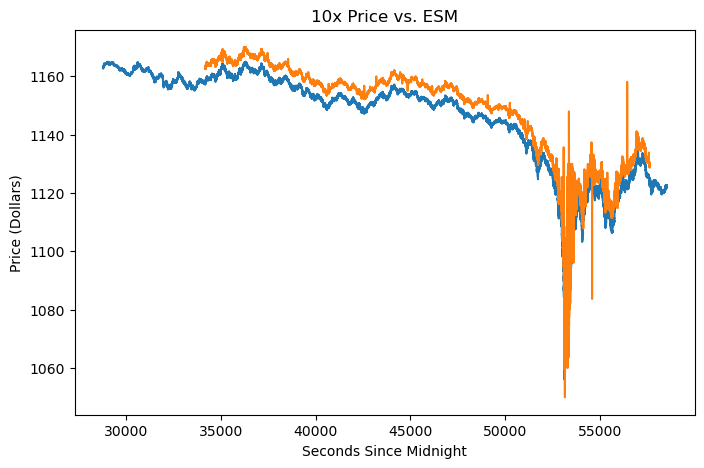

In [216]:
# A. Plotting the 10x trade price of SPY versus ESM
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df_esm_trades["Price"])
ax.plot(df_spy_trades["price"] * 10)
ax.set_title('10x Price vs. ESM')
ax.set_xlabel('Seconds Since Midnight')
ax.set_ylabel('Price (Dollars)')
fig.show()

In [227]:
df_spy_trades.loc[50000:]

,sym_root,sym_suffix,date,time_m,price,size,exchange
t_after_midnight,,,,,,,
50000,SPY,,20100506,2023-10-16 13:53:20.259,114.93,100,Z
50000,SPY,,20100506,2023-10-16 13:53:20.259,114.93,200,Z
50000,SPY,,20100506,2023-10-16 13:53:20.259,114.93,200,Z
50000,SPY,,20100506,2023-10-16 13:53:20.259,114.93,200,B
50000,SPY,,20100506,2023-10-16 13:53:20.259,114.93,199,T
...,...,...,...,...,...,...,...
57599,SPY,,20100506,2023-10-16 15:59:59.986,112.89,800,P
57599,SPY,,20100506,2023-10-16 15:59:59.986,112.89,700,P
57599,SPY,,20100506,2023-10-16 15:59:59.999,112.88,200,T


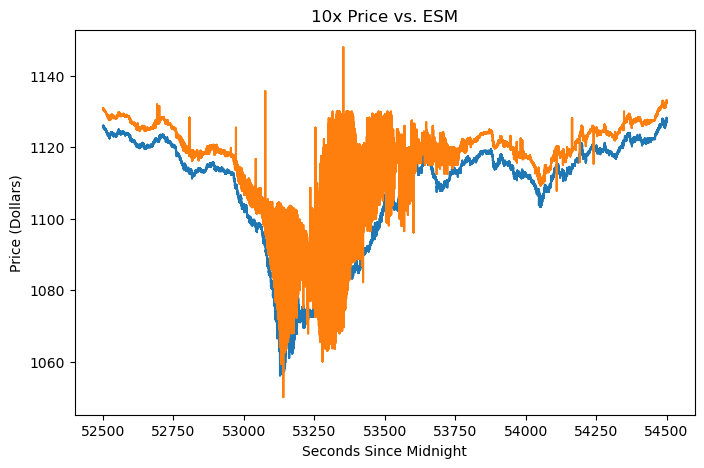

In [252]:
# B. Finding when the flash crash started and when it ended 
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df_esm_trades["Price"].loc[52500:54500]) # BLUE
ax.plot((df_spy_trades["price"] * 10).loc[52500:54500]) # ORANGE
ax.set_title('10x Price vs. ESM')
ax.set_xlabel('Seconds Since Midnight')
ax.set_ylabel('Price (Dollars)')
fig.show()

In [251]:
start_flash_crash = df_esm_trades.loc[52800]
end_flash_crash = df_esm_trades.loc[53600]
print(f"The flash crash started around {start_flash_crash['Date-Time'].unique()[0]}")
print(f"The flash crash ended around {end_flash_crash['Date-Time'].unique()[0]}")

# Finding the minimum
time_of_min = df_esm_trades["Price"].idxmin()
print(f'The minimum occurred at {df_esm_trades.loc[time_of_min]["Date-Time"].unique()[0]}')

The flash crash started around 2010-05-06 14:40:00.000316-04:00
The flash crash ended around 2010-05-06 14:53:20.014468-04:00
The minimum occurred at 2010-05-06 14:45:28.002152-04:00


C. The arbitrage relationship broke down during the flash crash. Note that as ESM is rising at ~53300, SPY is still fluctuating heavily, and when plotting the price difference, we can see that around ~53000 is when the price difference begins to deviate from its historical mean rapidly. 

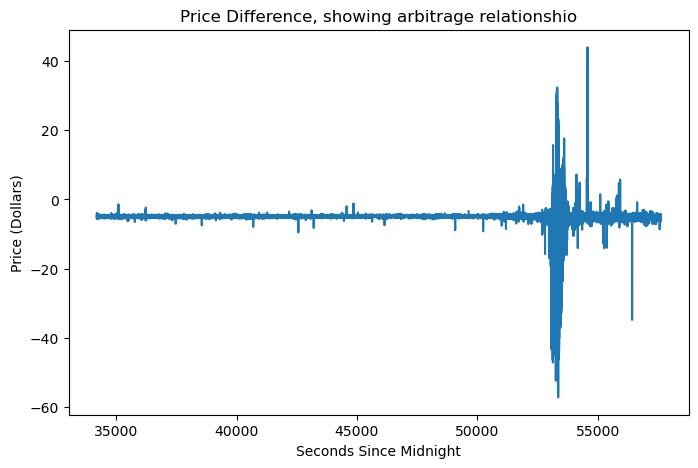

In [325]:
# C. Plotting the price difference, shwoing the arbitrage relationshio
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df_esm_trades["Price"] - 10 * df_spy_trades["price"]) # BLUE
ax.set_title('Price Difference, showing arbitrage relationshio')
ax.set_xlabel('Seconds Since Midnight')
ax.set_ylabel('Price (Dollars)')
fig.show()

# Problem 4: Intraday liquidity

A. Plot volume, bid-ask spreads, and sizes at the bid and ask in both markets on a minute-by-minute (or second-by-second) basis. Based on my own research, a potentially good measure of market liqidity is  

$$
\frac{0.50 \cdot (Q_{ask} + Q_{bid}) \cdot P_{midpoint}^2}{P_{ask} - P_{bid}}
$$

Theoretically, this quantity measures the quantity of dollars bought or sold to move prices one dollar. The quantities should be adjusted by the factor of 50 and factor of 10 needed to convert contracts or shares into dollars worth of the S&P 500 index. Calculate this measure of liquidity on a minute-by-minute or second-by-second basis. (Hint: Consider use a log scale for the vertical axis.) 

B. Were price changes reasonably continuous during the day, or were there significant instantaneous jumps in prices of more than one tick, in both the futures market and the most active stock exchanges?

C. Would it be reasonable to infer that a breakdown in liquidity caused the flash crash, or vice versa?

# Problem 4 Solution

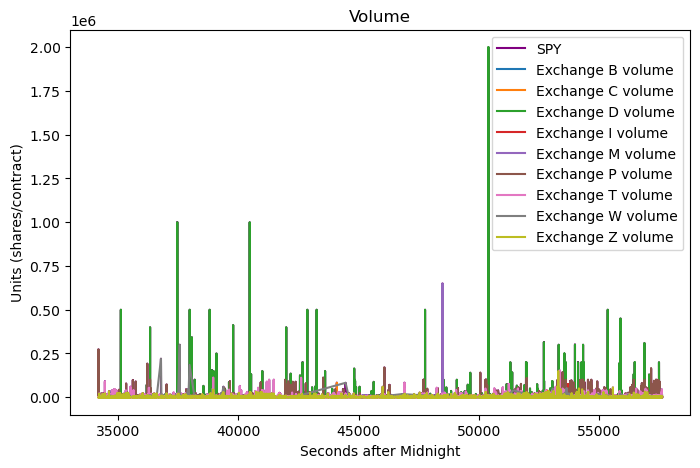

In [261]:
"""
A. Plotting volume, bid-ask spreads, bid and ask sizes.
"""
exchange_dfs = [group for _, group in df_spy_trades.groupby("exchange")]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df_spy_trades['size'], label = 'SPY', color='purple')
for df in exchange_dfs:
    exchange = df['exchange'].unique()[0]
    ax.plot(df['size'], label = f"Exchange {exchange} volume")

ax.set_title('Volume')
ax.set_xlabel('Seconds after Midnight')
ax.set_ylabel('Units (shares/contract)')
ax.legend()
fig.show()


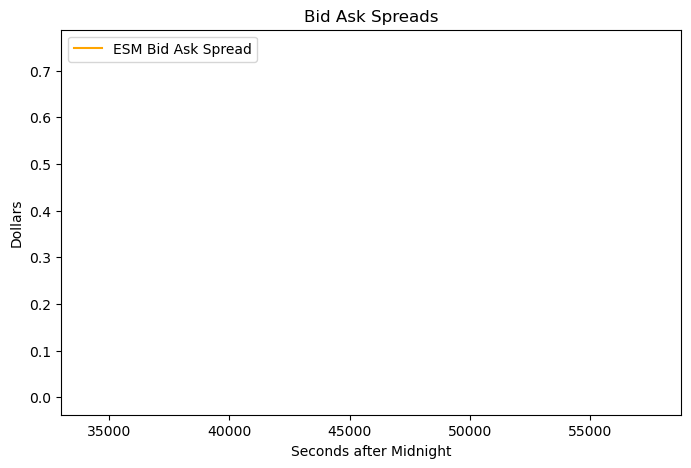

In [12]:
df_spy_trades = df_spy_quotes.dropna()
# Plotting ESM bid ask spreads
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df_esm_quotes['Ask Price'] - df_esm_quotes["Bid Price"], label = 'ESM Bid Ask Spread', color='orange')
    
ax.set_title('Bid Ask Spreads')
ax.set_xlabel('Seconds after Midnight')
ax.set_ylabel('Dollars')
ax.legend()
fig.show()

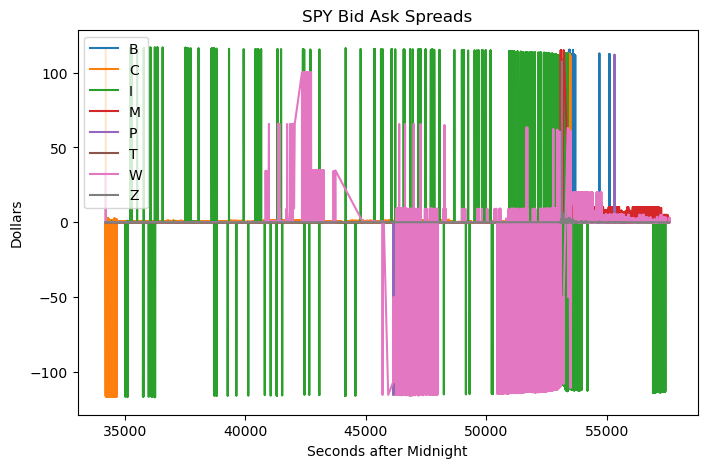

In [13]:
# Plotting SPY bid ask spreads
fig, ax = plt.subplots(figsize=(8, 5))
exchange_dfs = [group for _, group in df_spy_quotes.groupby("exchange")]
for df in exchange_dfs:
    exchange = df['exchange'].unique()[0]
    ax.plot(df["ask"] - df["bid"], label=f"{exchange}")
    
ax.set_title('SPY Bid Ask Spreads')
ax.set_xlabel('Seconds after Midnight')
ax.set_ylabel('Dollars')
ax.legend()
fig.show()

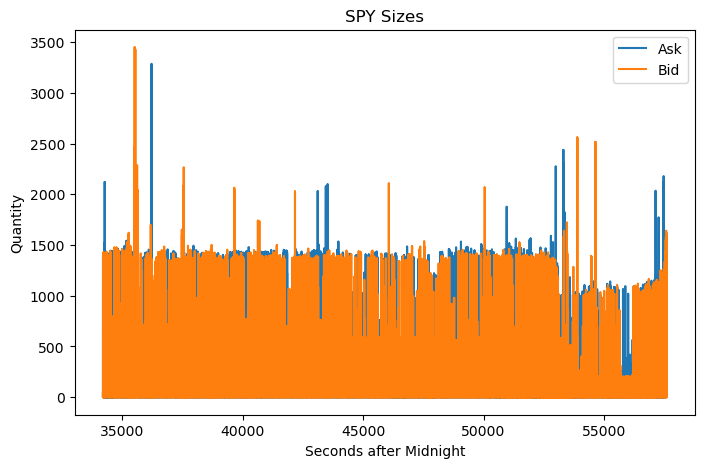

In [333]:
# Plotting SPY Bid and Ask sizes
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df_spy_quotes["asksize"], label = 'Ask')
ax.plot(df_spy_quotes['bidsize'], label = "Bid")
    
ax.set_title('SPY Sizes')
ax.set_xlabel('Seconds after Midnight')
ax.set_ylabel('Quantity')
ax.legend()
fig.show()

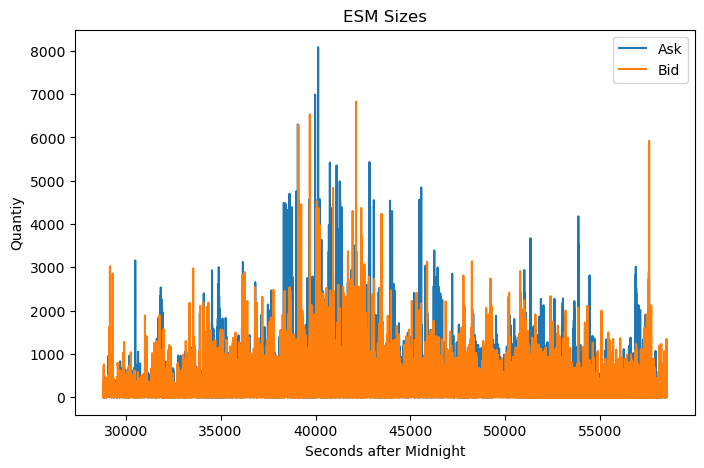

In [331]:
# Plotting ESM Bid and Ask Sizes
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df_esm_quotes["Ask Size"], label = 'Ask')
ax.plot(df_esm_quotes['Bid Size'], label = "Bid")
    
ax.set_title('ESM Sizes')
ax.set_xlabel('Seconds after Midnight')
ax.set_ylabel('Quantiy')
ax.legend()
fig.show()

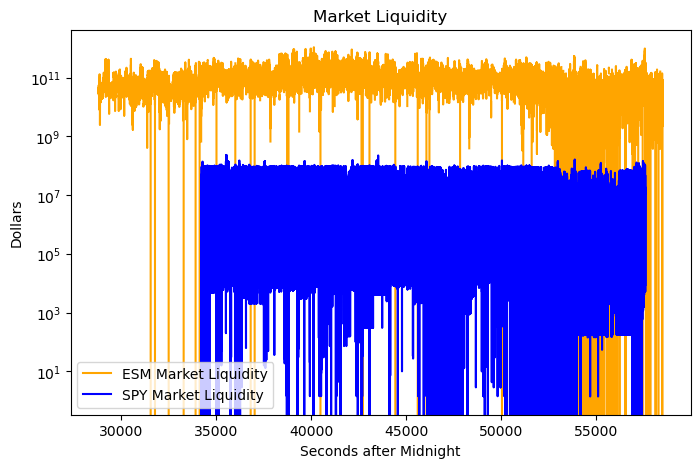

In [315]:
df_esm_quotes = df_esm_quotes.fillna(method="ffill").dropna()
df_spy_quotes = df_spy_quotes.fillna(method="ffill").dropna()

def market_liquidity(q_ask, q_bid, p_ask, p_bid):
    p_mid = (p_bid + p_ask) / 2
    return (0.5 * (q_ask + q_bid) * (p_mid ** 2)) / (p_ask - p_bid)

# Plotting market liquidity
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(market_liquidity(df_esm_quotes["Ask Size"] * 50, df_esm_quotes["Bid Size"] * 50, df_esm_quotes["Ask Price"], df_esm_quotes["Bid Price"]), 
                        label = 'ESM Market Liquidity', color='orange')

ax.plot(market_liquidity(df_spy_quotes["asksize"] / 10, df_spy_quotes["bidsize"] / 10, df_spy_quotes["ask"], df_spy_quotes["bid"]), 
                        label = 'SPY Market Liquidity', color='blue')
    
ax.set_title('Market Liquidity')
ax.set_xlabel('Seconds after Midnight')
ax.set_ylabel('Dollars')
plt.yscale("log")
ax.legend()
fig.show()

B. Price changes for both ESM and SPY were reasonably continuou throughout the day. Prior to the flash crash, both prices were steadily declining but there were no instantaneous jumps until the flash crash occurred.

C. Even while the prices of ESM and SPY were steadily declining, the arbitrage relationship held. Moreover, the bid-ask sizes for SPY especially remainded nearly constant while the prices were slowly decreasing. However, as soon as there was a dip in quantity, prices dropped rapidly, so I would infer that the breakdown in liquidity caused the flash crash. This would make the most sense furthermore from the view of automated, algorithmic traders. Their algorithms greatly contribute to the price of a security on the market, and when their algorithms are tested in an unusual market scenario, it could have caused a cascade of unplanned, accidental trades, causing prices to fall. During the flash crash, note that both a drop in liquidity and a drop in price would contribute to decline in the other, almost as a feedback loop. This loop would continue until third party intervention, which is why trading had to be halted during the flash crash for a few minutes.

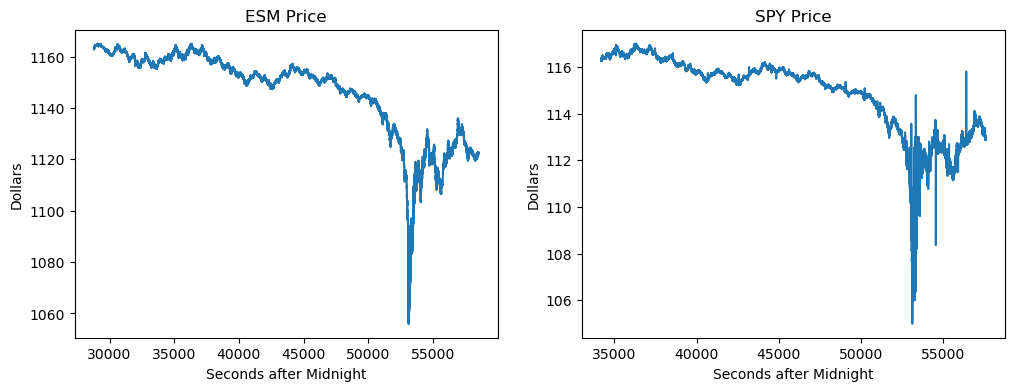

In [343]:
# Plotting Prices
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(df_esm_trades["Price"], label = 'ESM')
ax[0].set_title('ESM Price')
ax[0].set_xlabel('Seconds after Midnight')
ax[0].set_ylabel('Dollars')

ax[1].plot(df_spy_trades["price"], label = 'SPY')
ax[1].set_title('SPY Price')
ax[1].set_xlabel('Seconds after Midnight')
ax[1].set_ylabel('Dollars')
    
fig.show()

# (Extra Credit) Problem 5: Intraday volatility

Realized variance can be calculated by summing square price changes. The resulting measure of realized variance is sensitive to possible negative autocorrelation in price changes (potentially related to "bid-ask bounce" associated with market making). To be most accurate, price changes should be random (not correlated).

A. Using last trade and bid-ask midpoint, calculate the cumulative realized variance (cumulative sum of squared price changes) over various time intervals (e.g., 5 minutes, 1 minute, 10 seconds, 1 second) and plot realized variance over the day. Are the results consistent for last trade versus bid-ask midpoint and for various time intervals? Are price changes correlated?

B. Did intraday volatility change during the day? Is the change associated with the flash crash? (Hint: This will show up a steeper slope to the graph of cumulative realized variance over the day.)

C. Compared to a typical realized variance corresponding to about one percent per day (based on taking the square root of realized variance), how many "typical days worth" of realized variance occured on the day of the flash crash.

